In [3]:
from sagas.ofbiz.services import OfService as s
from sagas.ofbiz.entities import OfEntity as e, oc, finder, MetaEntity
import sagas.ofbiz.entities as ee

# oc.import_package('com.sagas.generic.*')
# hub=oc.j.EntityEventHub.getEntityEventHub(oc.delegator)
hub=oc.component('entity_event_hub')
# hub.setTrackOn(True)
hub.setMeasureUpdaterOn(True)

e().storeProductType(productTypeId="Test_type_2")

{'productTypeId': 'Test_type_2'}

In [4]:
import json

hub.setTrackOn(False)
jsonstr=oc.j.ValueHelper.entityToJson(e().refProduct('GZ-2002'), oc.jmap())
json.loads(jsonstr)

{'originGeoId': None,
 'detailScreen': None,
 'createdStamp': 1548508164570,
 'requireInventory': None,
 'quantityUomId': None,
 'mediumImageUrl': None,
 'productName': 'Square Gizmo',
 'introductionDate': None,
 'shippingHeight': None,
 'originalImageUrl': None,
 'inShippingBox': None,
 'detailImageUrl': None,
 'supportDiscontinuationDate': None,
 'productWidth': None,
 'includeInPromotions': None,
 'configId': None,
 'billOfMaterialLevel': None,
 'lotIdFilledIn': None,
 'productRating': None,
 'createdByUserLogin': 'admin',
 'brandName': None,
 'requireAmount': None,
 'productId': 'GZ-2002',
 'smallImageUrl': '/images/products/GZ-2002/small.png',
 'taxable': 'Y',
 'primaryProductCategoryId': '101',
 'salesDiscontinuationDate': None,
 'createdTxStamp': 1548508162215,
 'lastUpdatedTxStamp': 1548508174864,
 'salesDiscWhenNotAvail': None,
 'returnable': None,
 'weightUomId': None,
 'isVirtual': 'N',
 'priceDetailText': None,
 'reserv2ndPPPerc': None,
 'widthUomId': None,
 'longDescriptio

In [5]:
hub.registerSubscriber('ProductType', 'store', 'run', 'queue')

In [2]:
e().storeProductType(productTypeId="Test_type_2")

{'productTypeId': 'Test_type_2'}

In [7]:
evq=hub.getEventQueue('ProductType', 'store', 'run')
print(evq.isEmpty())
print(evq)
print(evq.poll())

False
[{"_event":"run","productTypeId":"Test_type_2","_operation":"store"}]
{"_event":"run","productTypeId":"Test_type_2","_operation":"store"}


In [8]:
evq=hub.getEventQueue('ProductType', 'store', 'run')
while not evq.isEmpty():
    val=evq.poll()
    print(val)

In [13]:
hub.registerSubscriber('ProductType', 'store', 'run', 'kafka')
e().storeProductType(productTypeId="Test_type_2")

{'productTypeId': 'Test_type_2'}

In [3]:
e().storeProductType(productTypeId="Test_type_3")

{'productTypeId': 'Test_type_3'}

## service eca procedure - sync
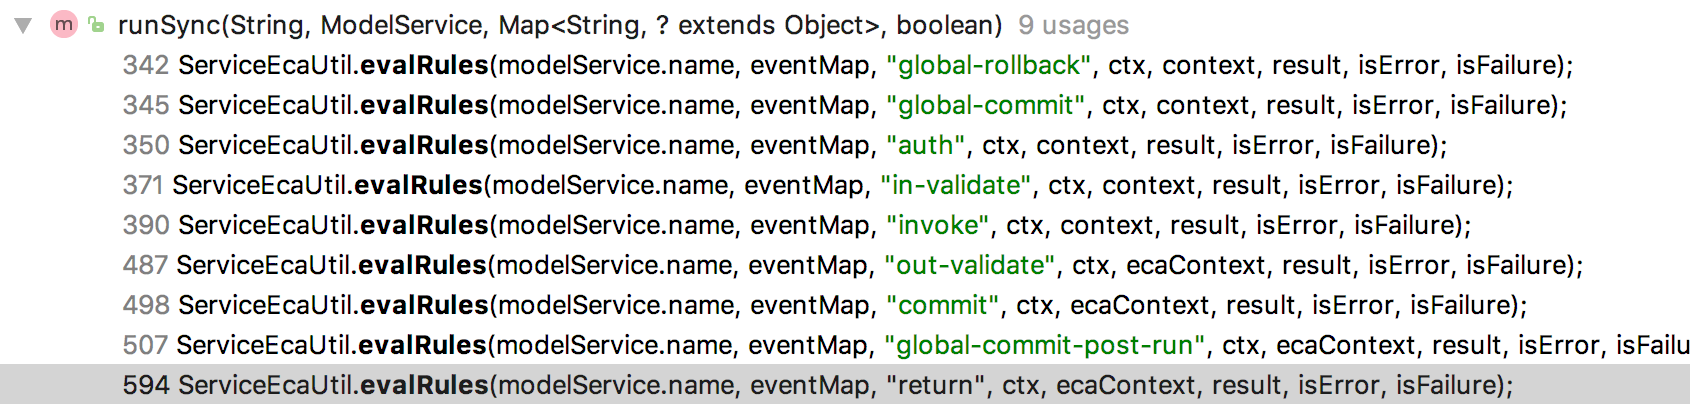

## service eca procedure - async
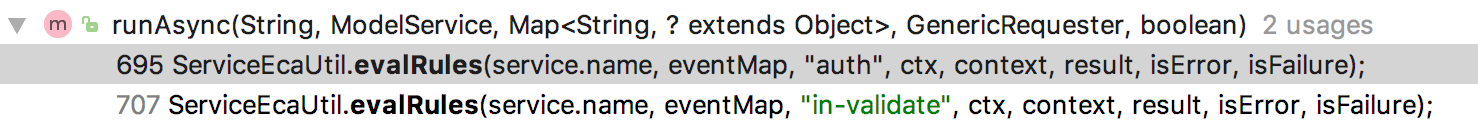

In [4]:
s().testScv(defaultValue=5.5, message="hello world")

(True, {'responseMessage': 'success', 'resp': 'service done'})

In [19]:
from sagas.ofbiz.entities import OfEntity as e, oc
oc.import_package('org.apache.ofbiz.service.ServiceDispatcher')

def track_services(filter_by=0):
    log=oc.j.ServiceDispatcher.getServiceLogMap()
    for rs,value in log.items():
        if rs.getStartStamp().getTime()>=filter_by:
            print('✔', oc.get(rs.getModelService(), 'name'), 
                  rs.getLocalName(), rs.getMode(), 
                  rs.getStartStamp(), '➷',
                  rs.getEndStamp().getTime()-rs.getStartStamp().getTime(), 'ms')

# now=oc.j.System.currentTimeMillis()
# track_services(now)
track_services()

✔ testScv default 21 2019-02-09 16:23:42.0 ➷ 0 ms
✔ fixedAssetPermissionCheck default 21 2019-02-09 15:47:16.943 ➷ 1340 ms
✔ genericBasePermissionCheck default 21 2019-02-09 15:47:17.209 ➷ 1038 ms
✔ sendEmailDated default 21 2019-02-09 16:02:17.315 ➷ 30 ms
✔ sendEmailDated default 21 2019-02-09 15:47:16.928 ➷ 275 ms
✔ createMaintsFromTimeInterval default 21 2019-02-09 15:47:16.929 ➷ 1418 ms
✔ testScv default 21 2019-02-09 16:21:22.974 ➷ 6 ms
✔ sendEmailDated default 21 2019-02-09 16:17:17.766 ➷ 44 ms
✔ testScv default 21 2019-02-09 16:22:49.441 ➷ 1 ms


In [22]:
from sagas.ofbiz.services import OfService as s
def track(fn):
    now=oc.j.System.currentTimeMillis()
    ret=fn(now)
    print(ret)
    track_services(now)

track(lambda a: s().testScv(defaultValue=5.5, message="hello world"))

(True, {'responseMessage': 'success', 'resp': 'service done'})
✔ testScv default 21 2019-02-09 16:26:21.453 ➷ 1 ms


In [1]:
from sagas.ofbiz.services import OfService as s, oc, track
from sagas.ofbiz.entities import OfEntity as e

def all_entities():
    model_reader=oc.delegator.getModelReader()
    names=model_reader.getEntityNames()
    return names

entities=all_entities()
print(len(entities))

1129


In [8]:
from sagas.ofbiz.entities import OfEntity as e, oc, finder, MetaEntity

def norm_package(pkg):
    if pkg.startswith('com.'):
        return pkg[4:].replace('.','_')
    else:
        return pkg.replace('org.apache.ofbiz.', '').replace('org.ofbiz.','').replace('.','_')

model_reader=oc.delegator.getModelReader()
tree_map=model_reader.getEntitiesByPackage(None, None)
print(len(tree_map))
for k,v in tree_map.items():
    print(norm_package(k), '➼', k)



101
common_datasource ➼ org.apache.ofbiz.common.datasource
workeffort_workeffort ➼ org.apache.ofbiz.workeffort.workeffort
accounting_ledger ➼ org.apache.ofbiz.accounting.ledger
content_survey ➼ org.apache.ofbiz.content.survey
entity_sequence ➼ org.apache.ofbiz.entity.sequence
common_property ➼ org.apache.ofbiz.common.property
common_method ➼ org.apache.ofbiz.common.method
accounting_budget ➼ org.apache.ofbiz.accounting.budget
humanres_employment ➼ org.apache.ofbiz.humanres.employment
common_uom ➼ org.apache.ofbiz.common.uom
humanres_position ➼ org.apache.ofbiz.humanres.position
workeffort_timesheet ➼ org.apache.ofbiz.workeffort.timesheet
common_portal ➼ org.apache.ofbiz.common.portal
accounting_tax ➼ org.apache.ofbiz.accounting.tax
order_shoppinglist ➼ org.apache.ofbiz.order.shoppinglist
entity_test ➼ org.apache.ofbiz.entity.test
shipment_picklist ➼ org.apache.ofbiz.shipment.picklist
common_keyword ➼ org.apache.ofbiz.common.keyword
entity_synchronization ➼ org.apache.ofbiz.entity.synch

In [8]:
# entries=tree_map['org.apache.ofbiz.common.note']
entries=tree_map['org.apache.ofbiz.product.feature']
for entry in entries:
    print(entry)

ProdFeaGrpAppAndProdFeaApp
ProductFeature
ProductFeatureAndAppl
ProductFeatureAppl
ProductFeatureApplAttr
ProductFeatureApplType
ProductFeatureCatGrpAppl
ProductFeatureCategory
ProductFeatureCategoryAppl
ProductFeatureDataResource
ProductFeatureGroup
ProductFeatureGroupAndAppl
ProductFeatureGroupAppl
ProductFeatureIactn
ProductFeatureIactnType
ProductFeatureType


In [9]:
def fix_field_name(field_name):
    if field_name=="toString":
        return "toStr"
    return field_name

field_name='toString'
fld = ent.getField(field_name)
print(fix_field_name('toString'))

toStr


In [1]:
from sagas.ofbiz.entities import OfEntity as e
e('meta').ProductFeature

,internal,name,primary,type,field type
0,,productFeatureId,*,id,id
1,,productFeatureTypeId,,id,id
2,,productFeatureCategoryId,,id,id
3,,description,,description,description
4,,uomId,,id,id
5,,numberSpecified,,fixed-point,fixed-point
6,,defaultAmount,,currency-amount,currency-amount
7,,defaultSequenceNum,,numeric,numeric
8,,abbrev,,id,id
9,,idCode,,id-long,id-long


In [8]:
product=e('json').refProduct('GZ-2002')
json.loads(product)

{'originGeoId': None,
 'detailScreen': None,
 'createdStamp': 1548508164570,
 'requireInventory': None,
 'quantityUomId': None,
 'mediumImageUrl': None,
 'productName': 'Square Gizmo',
 'introductionDate': None,
 'shippingHeight': None,
 'originalImageUrl': None,
 'inShippingBox': None,
 'detailImageUrl': None,
 'supportDiscontinuationDate': None,
 'productWidth': None,
 'includeInPromotions': None,
 'configId': None,
 'billOfMaterialLevel': None,
 'lotIdFilledIn': None,
 'productRating': None,
 'createdByUserLogin': 'admin',
 'brandName': None,
 'requireAmount': None,
 'productId': 'GZ-2002',
 'smallImageUrl': '/images/products/GZ-2002/small.png',
 'taxable': 'Y',
 'primaryProductCategoryId': '101',
 'salesDiscontinuationDate': None,
 'createdTxStamp': 1548508162215,
 'lastUpdatedTxStamp': 1548508174864,
 'salesDiscWhenNotAvail': None,
 'returnable': None,
 'weightUomId': None,
 'isVirtual': 'N',
 'priceDetailText': None,
 'reserv2ndPPPerc': None,
 'widthUomId': None,
 'longDescriptio

In [11]:
products=e('json').listProduct(_limit=2)
json.loads(products)

[{'originGeoId': None,
  'detailScreen': None,
  'createdStamp': 1549100065287,
  'requireInventory': None,
  'quantityUomId': None,
  'mediumImageUrl': None,
  'productName': None,
  'introductionDate': None,
  'shippingHeight': None,
  'originalImageUrl': None,
  'inShippingBox': None,
  'detailImageUrl': None,
  'supportDiscontinuationDate': None,
  'productWidth': None,
  'includeInPromotions': None,
  'configId': None,
  'billOfMaterialLevel': 0,
  'lotIdFilledIn': None,
  'productRating': None,
  'createdByUserLogin': 'system',
  'brandName': None,
  'requireAmount': None,
  'productId': '10001',
  'smallImageUrl': None,
  'taxable': None,
  'primaryProductCategoryId': None,
  'salesDiscontinuationDate': None,
  'createdTxStamp': 1549100065229,
  'lastUpdatedTxStamp': 1549100065229,
  'salesDiscWhenNotAvail': None,
  'returnable': None,
  'weightUomId': None,
  'isVirtual': 'N',
  'priceDetailText': None,
  'reserv2ndPPPerc': None,
  'widthUomId': None,
  'longDescription': None,

In [12]:
rs=e('json').listPerson(_limit=2)
json.loads(rs)

[{'yearsWithEmployer': None,
  'lastName': 'Administrator',
  'occupation': None,
  'gender': None,
  'employmentStatusEnumId': None,
  'socialSecurityNumber': None,
  'createdStamp': 1548508161586,
  'suffix': None,
  'mothersMaidenName': None,
  'middleNameLocal': None,
  'existingCustomer': None,
  'residenceStatusEnumId': None,
  'nickname': None,
  'partyId': 'accountingadmin',
  'memberId': None,
  'height': None,
  'passportNumber': None,
  'lastUpdatedStamp': 1548508161586,
  'lastNameLocal': None,
  'comments': None,
  'monthsWithEmployer': None,
  'createdTxStamp': 1548508159636,
  'weight': None,
  'lastUpdatedTxStamp': 1548508159636,
  'birthDate': None,
  'otherLocal': None,
  'firstName': 'Accounting',
  'cardId': None,
  'middleName': None,
  'firstNameLocal': None,
  'passportExpireDate': None,
  'salutation': None,
  'personalTitle': None,
  'deceasedDate': None,
  'totalYearsWorkExperience': None,
  'maritalStatus': None},
 {'yearsWithEmployer': None,
  'lastName': 'B

In [13]:
e('df').allPerson()

,lastName,createdStamp,partyId,lastUpdatedStamp,createdTxStamp,lastUpdatedTxStamp,firstName,middleName,personalTitle
0,Administrator,2019-01-26 21:09:21.586,accountingadmin,2019-01-26 21:09:21.586,2019-01-26 21:09:19.636,2019-01-26 21:09:19.636,Accounting,None,None
1,Buyer,2019-01-26 21:09:21.101,AcctBuyer,2019-01-26 21:09:21.101,2019-01-26 21:09:19.636,2019-01-26 21:09:19.636,Acct,None,None
2,ADMINISTRATOR,2019-01-26 21:09:18.229,admin,2019-01-26 21:09:18.229,2019-01-26 21:09:18.222,2019-01-26 21:09:18.222,THE,PRIVILEGED,Mr.
3,Smith,2019-01-26 21:09:18.863,approver,2019-01-26 21:09:18.863,2019-01-26 21:09:18.278,2019-01-26 21:09:18.278,Robert,None,Captain
4,Al,2019-01-26 21:09:18.530,AUTHOR_BIGAL,2019-01-26 21:09:18.530,2019-01-26 21:09:18.278,2019-01-26 21:09:18.278,Big,None,None
5,Max,2019-01-26 21:09:18.591,AUTHOR_MADMAX,2019-01-26 21:09:18.591,2019-01-26 21:09:18.278,2019-01-26 21:09:18.278,Mad,None,None
6,Administrator,2019-01-26 21:09:18.268,bizadmin,2019-01-26 21:09:18.268,2019-01-26 21:09:18.222,2019-01-26 21:09:18.222,Business,None,None
7,Blog,2019-01-26 21:09:18.400,BLOGUSER_ADMIN,2019-01-26 21:09:18.400,2019-01-26 21:09:18.278,2019-01-26 21:09:18.278,Admin,None,None
8,Blog,2019-01-26 21:09:18.453,BLOGUSER_EDITOR,2019-01-26 21:09:18.453,2019-01-26 21:09:18.278,2019-01-26 21:09:18.278,Editor,None,None
9,Blog,2019-01-26 21:09:18.521,BLOGUSER_GUEST,2019-01-26 21:09:18.521,2019-01-26 21:09:18.278,2019-01-26 21:09:18.278,Guest,None,None


In [14]:
e('meta').TestFieldType

,internal,name,primary,type,field type
0,,testFieldTypeId,*,id,id
1,,blobField,,blob,blob
2,,byteArrayField,,byte-array,byte-array
3,,objectField,,object,object
4,,dateField,,date,date
5,,timeField,,time,time
6,,dateTimeField,,date-time,date-time
7,,fixedPointField,,fixed-point,fixed-point
8,,floatingPointField,,floating-point,floating-point
9,,numericField,,numeric,numeric


In [24]:
from sagas.ofbiz.date_time import DateTime
# don't support blob and object field
# oc.import_package('java.sql.Blob') 
e().storeTestFieldType(testFieldTypeId="test_type_1",
                   byteArrayField=b'xyz',
                   dateField=DateTime.date('2010-12-10'),
                   timeField=DateTime.time('12:12:10'))

{'lastUpdatedStamp': JavaObject id=o6559, 'timeField': JavaObject id=o6560, 'dateField': JavaObject id=o6561, 'lastUpdatedTxStamp': JavaObject id=o6562, 'testFieldTypeId': 'test_type_1', 'byteArrayField': b'xyz'}

In [25]:
e('json').refTestFieldType("test_type_1")

'{"objectField":null,"lastUpdatedStamp":1550332209989,"numericField":null,"createdTxStamp":1550323338366,"timeField":"12:12:10","createdStamp":1550323338397,"dateField":1291910400000,"lastUpdatedTxStamp":1550332209988,"dateTimeField":null,"clobField":null,"testFieldTypeId":"test_type_1","blobField":null,"floatingPointField":null,"byteArrayField":"eHl6","fixedPointField":null}'

In [2]:
from sagas.ofbiz.entity_gen import get_package_entities
pkg='org.apache.ofbiz.party.contact'
ents=get_package_entities(pkg)
print(ents)

{'ContactListPartyAndContactMech', 'ContactMech', 'ContactMechAttribute', 'ContactMechDetail', 'ContactMechLink', 'ContactMechPurposeType', 'ContactMechType', 'ContactMechTypeAttr', 'ContactMechTypePurpose', 'EmailAddressVerification', 'FtpAddress', 'PartyAndContactMech', 'PartyAndPostalAddress', 'PartyAndTelecomNumber', 'PartyContactDetailByPurpose', 'PartyContactMech', 'PartyContactMechPurpose', 'PostalAddress', 'PostalAddressBoundary', 'TelecomNumber', 'ValidContactMechRole'}
